# 🧠 Retail Revenue Forecasting Project (Built by Bagus Permono)

## 📌 Project Description
This project was developed as part of my data science learning journey to practice time series forecasting. I wanted to simulate a real-world scenario where a retail business needs to predict monthly revenue to make better planning decisions. I chose SARIMA for its ability to model both trends and seasonality

---

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")




---

## Load the Data
I worked with a dummy dataset that simulates monthly revenue over a 2.5-year period.


In [2]:
df = pd.read_csv("retail_revenue.csv", parse_dates=['Month'])
df.set_index('Month', inplace=True)
df = df.asfreq('MS')
df.head()


,Revenue,Marketing_Spend,Holiday_Flag
Month,,,
2022-01-01,53477.00,7097.44,1
2022-02-01,49032.15,10778.42,0
2022-03-01,54533.82,7979.75,0
2022-04-01,60661.21,6413.43,0
2022-05-01,48360.93,9233.82,0




---

## Visualize the Revenue
To understand the overall pattern, I plotted the revenue time series.


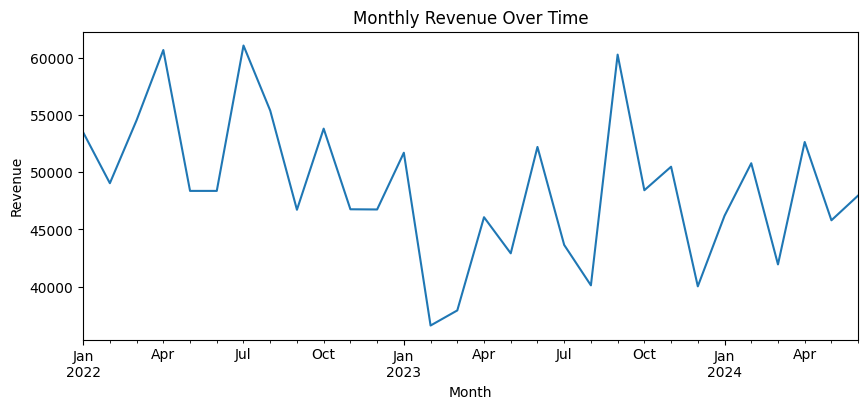

In [3]:
plt.figure(figsize=(10,4))
df['Revenue'].plot(title='Monthly Revenue Over Time')
plt.ylabel('Revenue')
plt.show()



This helped me see some visible patterns and seasonal behavior.

### Seasonal Decomposition
I used decomposition to separate trend, seasonality, and residual noise.


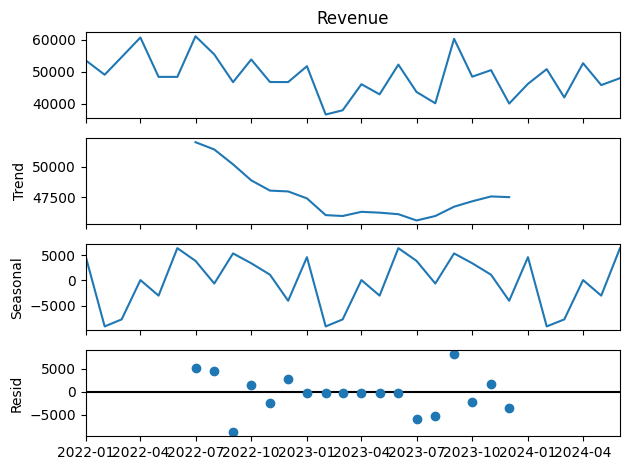

In [4]:
decompose_result = seasonal_decompose(df['Revenue'], model='additive')
decompose_result.plot()
plt.show()




---

## Train/Test Split
I split the dataset into training (all but last 6 months) and testing (last 6 months) to evaluate the model properly.


In [5]:
train = df.iloc[:-6]
test = df.iloc[-6:]




---

## Build the SARIMA Model
Based on EDA, I selected SARIMA(1,1,1)x(1,1,1,12) to capture the pattern.


In [6]:
model = SARIMAX(train['Revenue'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()




---

## Forecast Revenue for Test Period
Here’s the generated predictions on the test set.


In [7]:
forecast = result.predict(start=test.index[0], end=test.index[-1])




---

## Measure the Accuracy
To measure how well the model performs, I used MAE and RMSE.


In [8]:
mae = mean_absolute_error(test['Revenue'], forecast)
mse = mean_squared_error(test['Revenue'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 51688.58
RMSE: 51932.94




---

## Visual Comparison
I compared actual vs predicted revenue visually.


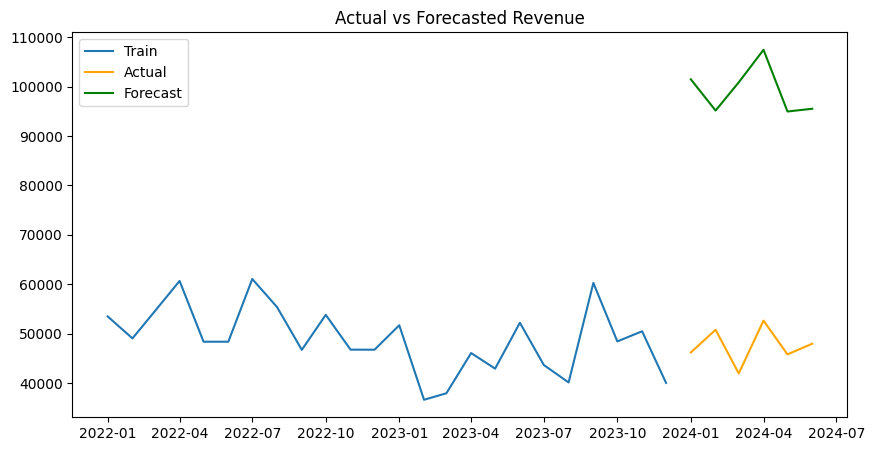

In [9]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Revenue'], label='Train')
plt.plot(test.index, test['Revenue'], label='Actual', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title("Actual vs Forecasted Revenue")
plt.show()




---

## Forecast the Next 6 Months
I used the same model to forecast into the future.


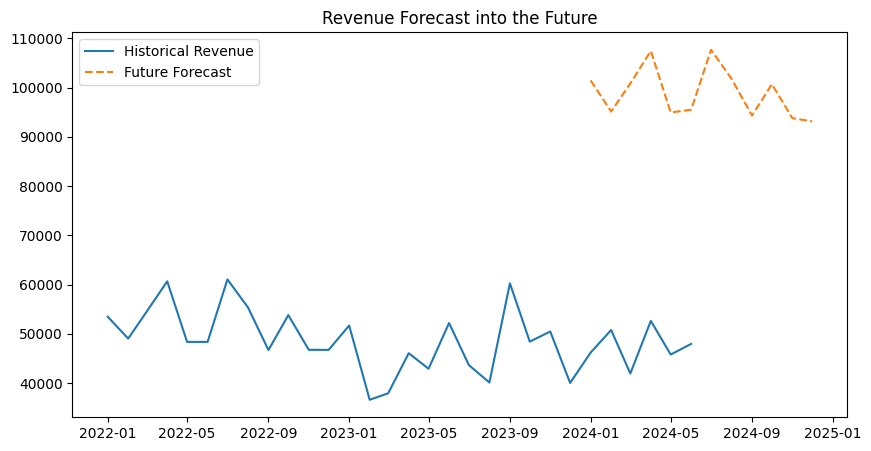

In [10]:
future_forecast = result.predict(start=df.index[-6], end=df.index[-1] + pd.DateOffset(months=6))

plt.figure(figsize=(10,5))
plt.plot(df.index, df['Revenue'], label='Historical Revenue')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', linestyle='--')
plt.title("Revenue Forecast into the Future")
plt.legend()
plt.show()




---

## ✅ Summary
- Handle time series data using pandas
- Visualize seasonal and trend components
- Apply SARIMA for forecasting
- Evaluate prediction accuracy with MAE/RMSE

I built this project to strengthen my understanding of time series forecasting and to showcase my ability to apply data science techniques to business problems.

> Built by: **Bagus Permono**

